In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
# link do danych: https://uploads.kodilla.com/bootcamp/pro-data-visualization/files/HRDataset.csv
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [152]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [153]:
df.dropna(thresh=2,inplace=True)

<AxesSubplot: >

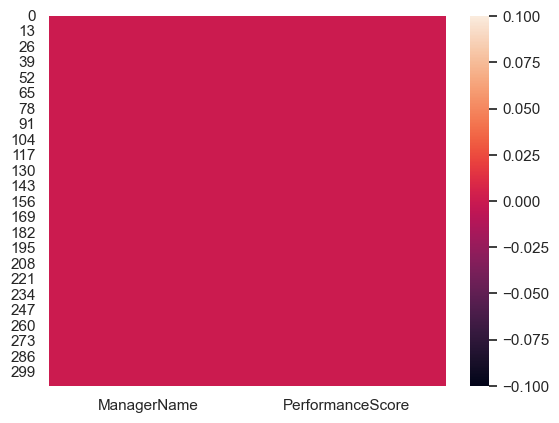

In [154]:
sns.heatmap(df[['ManagerName', 'PerformanceScore']].isnull())


# Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [155]:
df1=df.pivot_table(values='ManagerID',index='ManagerName',columns='PerformanceScore',aggfunc="count")
df1.head()

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,2.0,6.0,1.0,NaN
Amy Dunn,3.0,15.0,1.0,2.0
Board of Directors,NaN,2.0,NaN,NaN
Brandon R. LeBlanc,NaN,7.0,NaN,NaN
Brannon Miller,7.0,9.0,1.0,4.0


In [156]:
df1.fillna(0, inplace=True)
df1.head()

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,2.0,6.0,1.0,0.0
Amy Dunn,3.0,15.0,1.0,2.0
Board of Directors,0.0,2.0,0.0,0.0
Brandon R. LeBlanc,0.0,7.0,0.0,0.0
Brannon Miller,7.0,9.0,1.0,4.0


In [157]:
df1['Exceeds'] = pd.to_numeric(df1['Exceeds'])
df1['Fully Meets'] = pd.to_numeric(df1['Fully Meets'])
df1['Needs Improvement'] = pd.to_numeric(df1['Needs Improvement'])
df1['PIP'] = pd.to_numeric(df1['PIP'])

In [158]:
df1['Exceeds_pct'] = df1.apply(lambda row: row['Exceeds']/(row['Exceeds']+row['Fully Meets']+row['Needs Improvement']+row['PIP']),axis=1)
df1['Fully Meets_pct'] = df1.apply(lambda row: row['Fully Meets']/(row['Exceeds']+row['Fully Meets']+row['Needs Improvement']+row['PIP']),axis=1)
df1['Needs Improvement_pct'] = df1.apply(lambda row: row['Needs Improvement']/(row['Exceeds']+row['Fully Meets']+row['Needs Improvement']+row['PIP']),axis=1)
df1['PIP_pct'] = df1.apply(lambda row: row['PIP']/(row['Exceeds']+row['Fully Meets']+row['Needs Improvement']+row['PIP']),axis=1)
df1.head()

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP,Exceeds_pct,Fully Meets_pct,Needs Improvement_pct,PIP_pct
ManagerName,,,,,,,,
Alex Sweetwater,2.0,6.0,1.0,0.0,0.222222,0.666667,0.111111,0.000000
Amy Dunn,3.0,15.0,1.0,2.0,0.142857,0.714286,0.047619,0.095238
Board of Directors,0.0,2.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000
Brandon R. LeBlanc,0.0,7.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000
Brannon Miller,7.0,9.0,1.0,4.0,0.333333,0.428571,0.047619,0.190476


In [159]:
df2=df1.iloc[:, 4:]
df2.head()

PerformanceScore,Exceeds_pct,Fully Meets_pct,Needs Improvement_pct,PIP_pct
ManagerName,,,,
Alex Sweetwater,0.222222,0.666667,0.111111,0.000000
Amy Dunn,0.142857,0.714286,0.047619,0.095238
Board of Directors,0.000000,1.000000,0.000000,0.000000
Brandon R. LeBlanc,0.000000,1.000000,0.000000,0.000000
Brannon Miller,0.333333,0.428571,0.047619,0.190476


Text(0.5, 1.0, 'Performance Score by Manager')

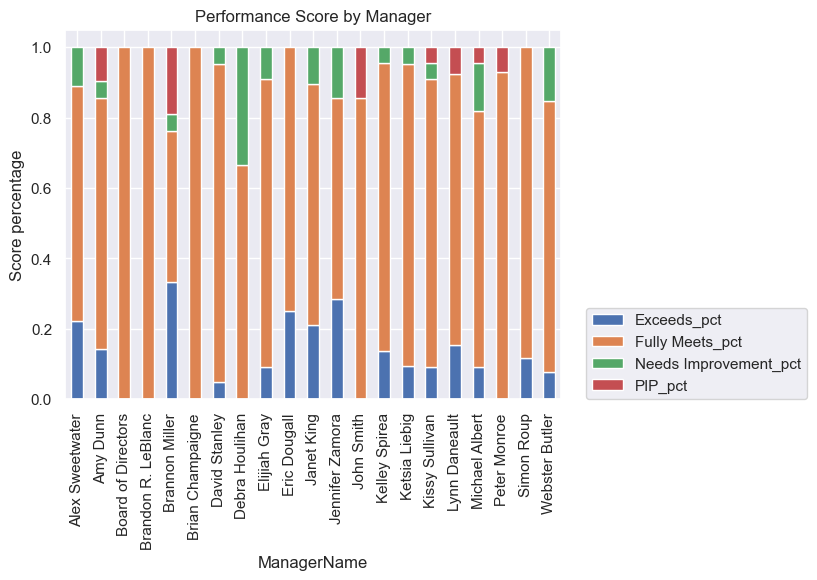

In [160]:
df2.plot(kind='bar', stacked=True)
plt.legend(loc=(1.05,0))
plt.ylabel('Score percentage')
plt.title('Performance Score by Manager')

Można podejrzewać, że istnieje pewna zależność pomiędzy oceną wydajności pracy w zależności od menedżera. Debra Houlihan nikogo nie oceniła na poziomie Exceeds, za to ma duży odsetek ocen Needs Improvement.

# Drugi sposób - z użyciem seaborna

In [161]:
df6=df2
df6.reset_index(inplace=True)
df6.head()

PerformanceScore,ManagerName,Exceeds_pct,Fully Meets_pct,Needs Improvement_pct,PIP_pct
0,Alex Sweetwater,0.222222,0.666667,0.111111,0.000000
1,Amy Dunn,0.142857,0.714286,0.047619,0.095238
2,Board of Directors,0.000000,1.000000,0.000000,0.000000
3,Brandon R. LeBlanc,0.000000,1.000000,0.000000,0.000000
4,Brannon Miller,0.333333,0.428571,0.047619,0.190476


Text(0.5, 1.0, 'Performance Score by Manager')

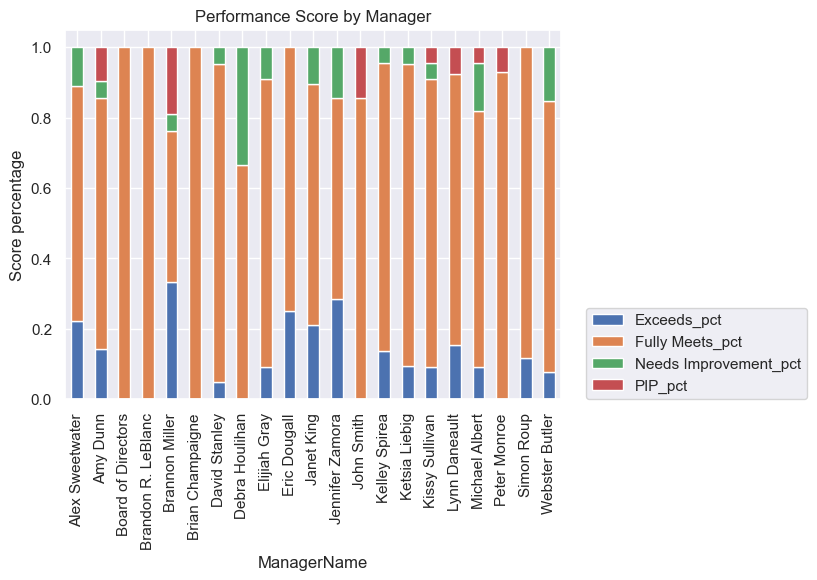

In [162]:
sns.set()
df6.set_index('ManagerName').plot(kind='bar', stacked=True)
plt.legend(loc=(1.05,0))
plt.ylabel('Score percentage')
plt.title('Performance Score by Manager')

# Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [163]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


In [164]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [165]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [166]:
df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.916035
1,2014-01-06,NaT,5.722226
2,2014-09-29,NaT,4.993942
3,2015-02-16,2015-04-15,0.158799
4,2015-05-01,NaT,4.408030


<AxesSubplot: xlabel='Seniority', ylabel='RecruitmentSource'>

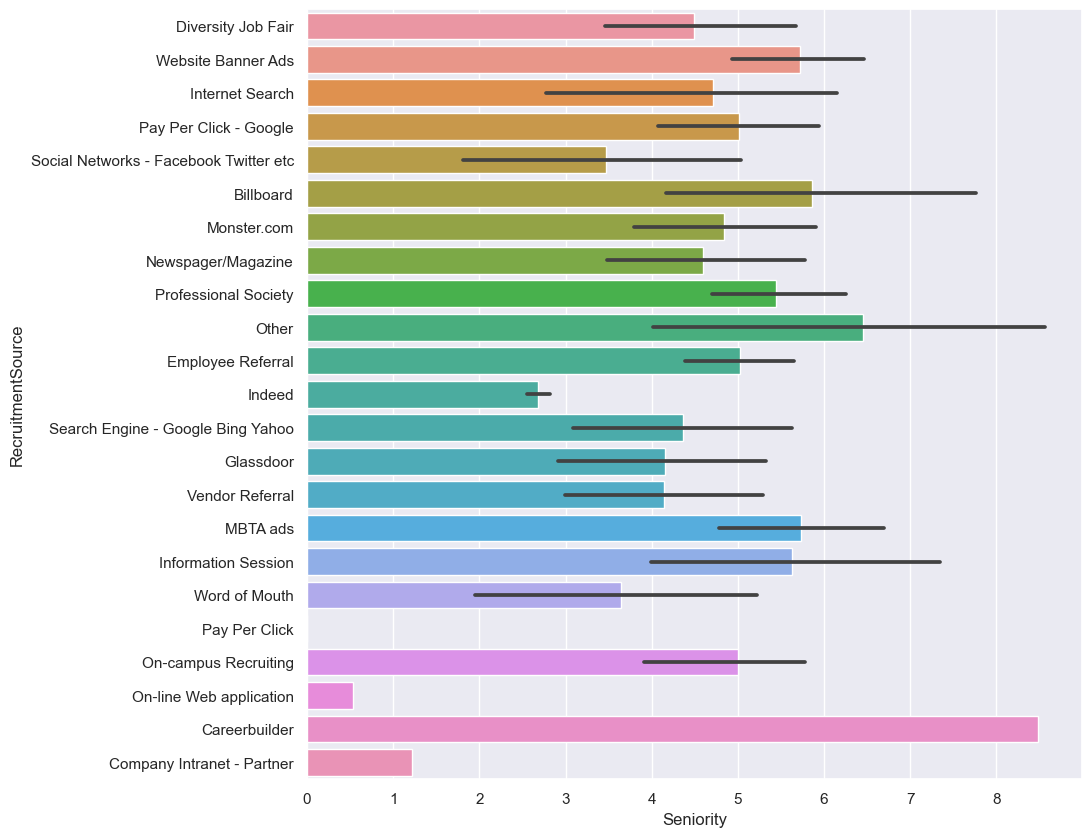

In [167]:
plt.figure(figsize=(10,10))
sns.barplot(x='Seniority',y='RecruitmentSource', orient="h", data=df)

In [168]:
df.pivot_table(values='Seniority',index='RecruitmentSource',aggfunc="count")


,Seniority
RecruitmentSource,
Billboard,16
Careerbuilder,1
Company Intranet - Partner,1
Diversity Job Fair,29
Employee Referral,31
Glassdoor,14
Indeed,8
Information Session,4
Internet Search,6


Z wyłączeniem źródeł rekrutacji, które ściągnęły tylko 1 pracownika, oraz z wyłączeniem źródeł "Other", najlepszym źródłem rekrutacji pod kątem stażu jest billboard.

# Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

In [169]:
df.pivot_table(values='EmpSatisfaction',index='MaritalDesc',aggfunc="count")


,EmpSatisfaction
MaritalDesc,
Divorced,30
Married,123
Separated,12
Single,137
Widowed,8


<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

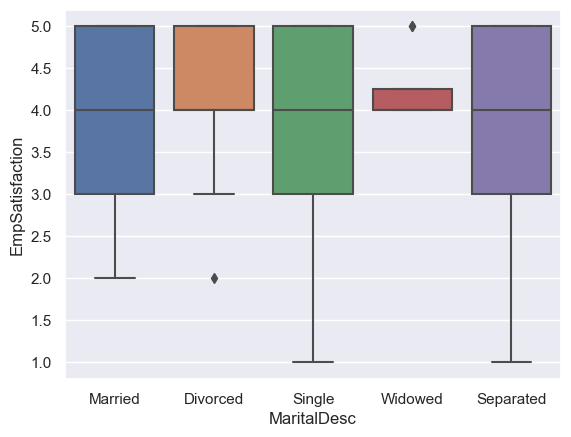

In [170]:
sns.boxplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

Stan cywilny nie bardzo koreluje z poziomem satysfakcji pracownika.

# Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [171]:
df['Age'] = df.apply(lambda row: dt.datetime(2019,9,27)-row['DOB'],axis=1)/np.timedelta64(1,'Y')
df['Age']

0      31.841858
1      35.420303
2      33.071179
3      34.029446
4      31.357249
         ...    
305   -32.310041
306    33.429845
307    36.630458
308   -45.953031
309    41.405368
Name: Age, Length: 310, dtype: float64

In [172]:
#Wyrzucam rekordy z błędną datą urodzin
df3=df[df['DOB']<dt.datetime(2019,9,27)]
df3.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.916035,31.841858
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.722226,35.420303
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.993942,33.071179
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,0.158799,34.029446
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.408030,31.357249


In [173]:
def zatrudniony_dalej(row):

    if pd.isnull(row['DateofTermination']):
        return "Zatrudniony dalej"
    else:
        return "Już nie pracuje"

In [174]:
df3['Status zatrudnienia'] = df3.apply(lambda row:zatrudniony_dalej(row),axis=1)
df3.head()

C:\Users\lukpy\AppData\Local\Temp\ipykernel_29240\285824515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Status zatrudnienia'] = df3.apply(lambda row:zatrudniony_dalej(row),axis=1)


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority,Age,Status zatrudnienia
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.916035,31.841858,Zatrudniony dalej
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.722226,35.420303,Zatrudniony dalej
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.993942,33.071179,Zatrudniony dalej
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,0.158799,34.029446,Już nie pracuje
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.408030,31.357249,Zatrudniony dalej


<AxesSubplot: xlabel='Status zatrudnienia', ylabel='Age'>

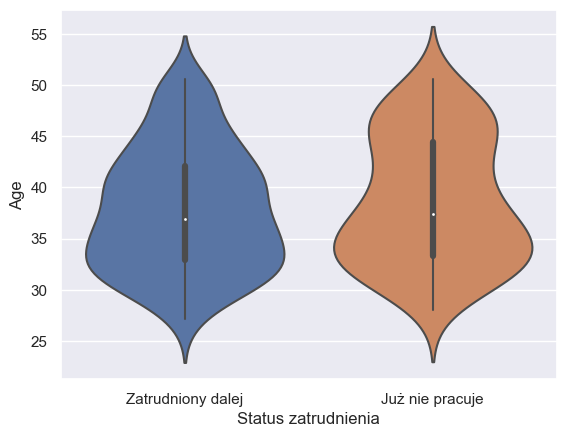

In [175]:
sns.violinplot(x='Status zatrudnienia',y='Age',data=df3)

<AxesSubplot: xlabel='Status zatrudnienia', ylabel='Age'>

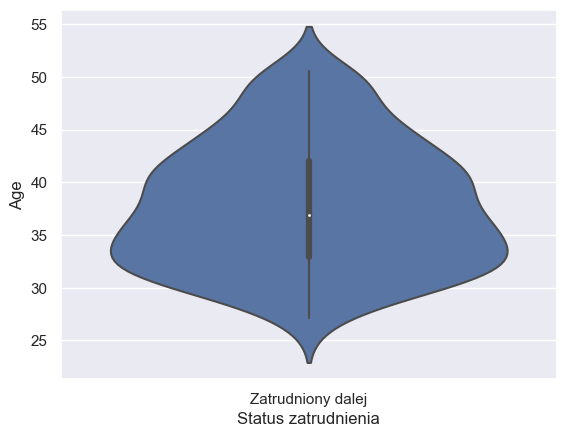

In [176]:
sns.violinplot(x='Status zatrudnienia',y='Age',data=df3[df3['Status zatrudnienia']=='Zatrudniony dalej'])

Wśród osób pracujących obecnie, przeważają osoby w wieku 32 - 40 lat. Osoby pracujące dalej są średnio nieco młodsze, niż te, które już nie pracują.

# Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

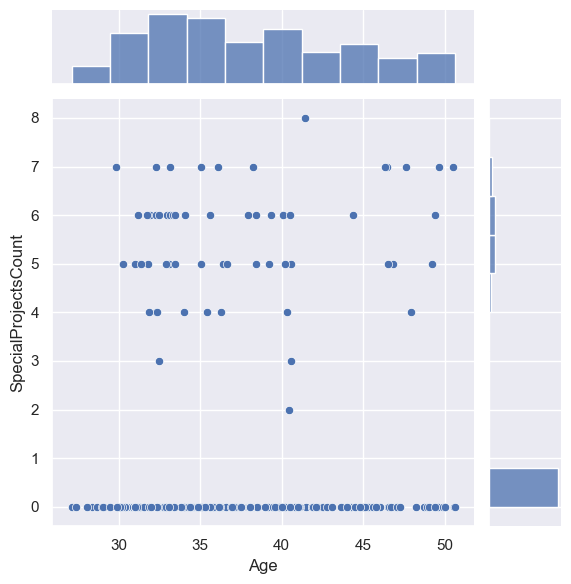

In [177]:
sns.jointplot(x='Age',y='SpecialProjectsCount',data=df3)

<AxesSubplot: xlabel='SpecialProjectsCount', ylabel='Age'>

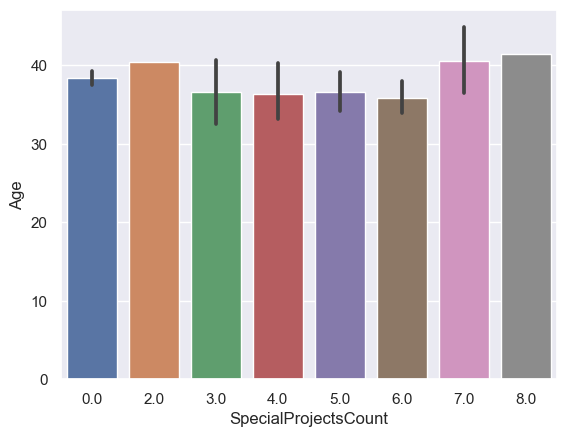

In [178]:
sns.barplot(x='SpecialProjectsCount',y='Age',data=df3)

Jest niewielka zależność między wiekiem a liczbą projektów specjalnych: wiek osób realizujących najwięcej projektów specjalnych (co najmniej 7) jest średnio rzezczbiorąc nieco wyższy, niż wiek osób realizujących 6 lub mniej projektów specjalnych.